In [171]:
import pandas as pd
import io

def read_data_from_file_like(file_like, columns_name=None):
    """
    Reads data from a file-like object (e.g., a file or a string)
    starting from the line containing "PRESSURE AIR_TEMP RAINFALL RELHUMID".

    Args:
        file_like: A file-like object (e.g., an opened file or a StringIO object).
        columns_name: An optional list of column names to use for the DataFrame.
                      If None, pandas will infer column names from the data.

    Returns:
        pandas.DataFrame: A DataFrame containing the parsed data, or None if the
                          starting line is not found.
    """

    data_lines = file_like.readlines()
    start_index = -1

    for i, line in enumerate(data_lines):
        if "PRESSURE AIR_TEMP RAINFALL RELHUMID" in line:
            start_index = i + 1  # Start reading from the line after this header
            break

    if start_index == -1:
        print("Error: 'PRESSURE AIR_TEMP RAINFALL RELHUMID' line not found.")
        return None

    data_to_parse = "".join(data_lines[start_index:])

    # Use io.StringIO to treat the string as a file
    data_io = io.StringIO(data_to_parse)

    try:
        df = pd.read_csv(data_io, delim_whitespace=True, names=columns_name) # Add names parameter
        return df
    except pd.errors.EmptyDataError:
        print("Error: No data to parse after the header line.")
        return None

In [172]:
column_names = [
    'height_code',
    'tmp1',
    'year',
    'month',
    'day',
    'hour',
    'tmp2',
    'tmp3',
    'time_step',
    'n',
    'e',
    'height',
    'pressure',
    'air_temp',
    'rainfall',
    'relhumid'
]

In [141]:
# --- Example Usage ---

# 1. Reading from a file:
with open("data/tdump_14060306", "r") as file:
    df = read_data_from_file_like(file, column_names)

C:\Users\thuy\AppData\Local\Temp\ipykernel_25492\3366499988.py:37: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_io, delim_whitespace=True, names=columns_name) # Add names parameter


In [142]:
df

,height_code,tmp1,year,month,day,hour,tmp2,tmp3,time_step,n,e,height,pressure,air_temp,rainfall,relhumid
0,1,1,14,6,3,6,0,0,0.0,10.720,105.240,1000.0,897.3,295.9,0.0,86.1
1,2,1,14,6,3,6,0,0,0.0,10.720,105.240,1500.0,847.1,292.4,0.0,87.6
2,3,1,14,6,3,6,0,0,0.0,10.720,105.240,2000.0,799.3,290.0,0.0,79.4
3,1,1,14,6,3,5,0,1,-1.0,10.613,105.209,962.9,901.4,296.0,0.0,84.0
4,2,1,14,6,3,5,0,1,-1.0,10.667,105.229,1450.5,852.2,292.9,0.0,83.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,2,1,14,5,24,7,0,1,-239.0,1.048,93.761,951.3,905.4,295.3,0.0,67.9
719,3,1,14,5,24,7,0,1,-239.0,-1.889,104.535,54.7,1002.4,304.3,0.8,56.9
720,1,1,14,5,24,6,0,0,-240.0,-1.122,95.589,567.4,946.7,296.9,0.0,82.0
721,2,1,14,5,24,6,0,0,-240.0,1.049,93.853,953.0,905.8,295.3,0.0,67.7


In [143]:
def create_datetime_column(df, year_col='year', month_col='month', day_col='day', hour_col='hour', year_prefix='20'):
    """
    Creates a datetime column from year, month, day, and hour columns.

    Args:
        df (pd.DataFrame): Input DataFrame.
        year_col (str): Name of the year column.
        month_col (str): Name of the month column.
        day_col (str): Name of the day column.
        hour_col (str): Name of the hour column.
        year_prefix (str): Prefix to add to the year (e.g., '20' for 20xx).

    Returns:
        pd.DataFrame: DataFrame with the new 'datetime' column added.
    """
    try:
        df[year_col] = df[year_col].astype(str)
        df['year_full'] = year_prefix + df[year_col]
        df['year_full'] = df['year_full'].astype(int)
        df['year'] = df['year_full']

        df['datetime'] = pd.to_datetime(df[['year', month_col, day_col, hour_col]])
        df = df.drop(columns=['year_full'])
        return df
    except KeyError as e:
        print(f"Error: Column {e} not found in the DataFrame.")
        return df

In [144]:
df = create_datetime_column(df)

In [145]:
def select_desired_columns(df):
    """Selects and reorders the desired columns."""
    desired_cols = ['height_code', 'datetime', 'n', 'e', 'height', 'pressure', 'air_temp', 'rainfall', 'relhumid']
    try:
        return df[desired_cols]
    except KeyError as e:
        print(f"Error: Column {e} not found.")
        return None

In [146]:
df = select_desired_columns(df)

In [147]:
df

,height_code,datetime,n,e,height,pressure,air_temp,rainfall,relhumid
0,1,2014-06-03 06:00:00,10.720,105.240,1000.0,897.3,295.9,0.0,86.1
1,2,2014-06-03 06:00:00,10.720,105.240,1500.0,847.1,292.4,0.0,87.6
2,3,2014-06-03 06:00:00,10.720,105.240,2000.0,799.3,290.0,0.0,79.4
3,1,2014-06-03 05:00:00,10.613,105.209,962.9,901.4,296.0,0.0,84.0
4,2,2014-06-03 05:00:00,10.667,105.229,1450.5,852.2,292.9,0.0,83.3
...,...,...,...,...,...,...,...,...,...
718,2,2014-05-24 07:00:00,1.048,93.761,951.3,905.4,295.3,0.0,67.9
719,3,2014-05-24 07:00:00,-1.889,104.535,54.7,1002.4,304.3,0.8,56.9
720,1,2014-05-24 06:00:00,-1.122,95.589,567.4,946.7,296.9,0.0,82.0
721,2,2014-05-24 06:00:00,1.049,93.853,953.0,905.8,295.3,0.0,67.7


In [ ]:
import geopandas
from shapely.geometry import Point

def create_geodataframe(df, x_col='e', y_col='n', crs="EPSG:4326"):
    """
    Converts a DataFrame with coordinate columns to a GeoDataFrame.

    Args:
        df (pd.DataFrame): Input DataFrame containing coordinate columns.
        x_col (str): Name of the column containing x-coordinates (e.g., longitude or Easting).
        y_col (str): Name of the column containing y-coordinates (e.g., latitude or Northing).
        crs (str): Coordinate Reference System to use (e.g., "EPSG:4326" for WGS 84).

    Returns:
        geopandas.GeoDataFrame: A GeoDataFrame with a 'geometry' column containing Point objects.
    """
    try:
        # 1. Create Point geometry from x and y columns
        geometry = [Point(xy) for xy in zip(df[x_col], df[y_col])]

        # 2. Create GeoDataFrame
        gdf = geopandas.GeoDataFrame(df, geometry=geometry, crs=crs)

        return gdf
    except KeyError as e:
        print(f"Error: Column {e} not found in the DataFrame: {e}")
        return None

In [149]:
gdf = create_geodataframe(df)

In [153]:
def split_geodataframe_by_height_code(gdf):
    """
    Splits a GeoDataFrame into three GeoDataFrames based on 'height_code' values (1, 2, 3).

    Args:
        gdf (geopandas.GeoDataFrame): Input GeoDataFrame.

    Returns:
        tuple: A tuple of three GeoDataFrames (gdf_1, gdf_2, gdf_3). If a height_code is missing, its corresponding gdf will be None.
    """

    gdf_1 = gdf[gdf['height_code'] == 1].copy() if 1 in gdf['height_code'].values else None
    gdf_2 = gdf[gdf['height_code'] == 2].copy() if 2 in gdf['height_code'].values else None
    gdf_3 = gdf[gdf['height_code'] == 3].copy() if 3 in gdf['height_code'].values else None

    gdf_1 = gdf_1.reset_index(drop=True)
    gdf_2 = gdf_2.reset_index(drop=True)
    gdf_3 = gdf_3.reset_index(drop=True)
    return gdf_1, gdf_2, gdf_3

In [154]:
gdf_1, gdf_2, gdf_3 = split_geodataframe_by_height_code(gdf)

In [155]:
gdf_1

,height_code,datetime,n,e,height,pressure,air_temp,rainfall,relhumid,geometry
0,1,2014-06-03 06:00:00,10.720,105.240,1000.0,897.3,295.9,0.0,86.1,POINT (105.24 10.72)
1,1,2014-06-03 05:00:00,10.613,105.209,962.9,901.4,296.0,0.0,84.0,POINT (105.209 10.613)
2,1,2014-06-03 04:00:00,10.526,105.165,929.4,905.1,296.1,0.0,82.5,POINT (105.165 10.526)
3,1,2014-06-03 03:00:00,10.459,105.109,888.2,909.6,296.3,0.4,81.4,POINT (105.109 10.459)
4,1,2014-06-03 02:00:00,10.406,105.041,844.4,914.2,296.6,0.0,79.1,POINT (105.041 10.406)
...,...,...,...,...,...,...,...,...,...,...
236,1,2014-05-24 10:00:00,-0.914,95.297,578.6,944.0,296.8,0.0,83.9,POINT (95.297 -0.914)
237,1,2014-05-24 09:00:00,-0.984,95.365,575.4,944.2,296.8,0.0,82.8,POINT (95.365 -0.984)
238,1,2014-05-24 08:00:00,-1.043,95.431,571.7,945.2,296.9,0.0,82.5,POINT (95.431 -1.043)
239,1,2014-05-24 07:00:00,-1.089,95.506,569.4,945.9,296.9,0.0,82.3,POINT (95.506 -1.089)


In [156]:
from shapely.geometry import Point, LineString
import pandas as pd
import geopandas

def gdf_lines_and_stats_by_height(gdf, time_col='datetime', n_col='n', e_col='e'):
    """
    Creates LineStrings from Point geometries, grouped by height_code,
    calculates mean for selected columns, sum for rainfall,
    and extracts first time, n, e.

    Returns a GeoDataFrame with one row per height_code.
    """
    try:
        mean_cols = ['pressure', 'air_temp', 'relhumid']

        def process_group(group):
            group = group.sort_values(by=time_col, ascending=False)

            line = LineString(group['geometry'].tolist())
            means = group[mean_cols].mean()
            rainfall_sum = group['rainfall'].sum()

            first_time = group[time_col].iloc[0]
            first_n = group[n_col].iloc[0]
            first_e = group[e_col].iloc[0]

            result = pd.Series(
                [line, first_time, first_n, first_e] + means.tolist() + [rainfall_sum],
                index=['geometry', 'datetime', 'n', 'e'] + mean_cols + ['rainfall'],
            )
            return result

        result_df = gdf.groupby('height_code').apply(process_group)

        line_gdf = geopandas.GeoDataFrame(result_df, geometry='geometry', crs=gdf.crs)
        line_gdf = line_gdf.reset_index()

        return line_gdf
    except Exception as e:
        print(f"Error processing data: {e}")
        return None


In [157]:
gdf = gdf_lines_and_stats_by_height(gdf)

C:\Users\thuy\AppData\Local\Temp\ipykernel_25492\2704382059.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = gdf.groupby('height_code').apply(process_group)


In [158]:
gdf

,height_code,geometry,datetime,n,e,pressure,air_temp,relhumid,rainfall
0,1,"LINESTRING (105.24 10.72, 105.209 10.613, 105....",2014-06-03 06:00:00,10.72,105.24,924.016598,296.472199,78.242324,88.6
1,2,"LINESTRING (105.24 10.72, 105.229 10.667, 105....",2014-06-03 06:00:00,10.72,105.24,911.070539,295.713278,77.422822,105.8
2,3,"LINESTRING (105.24 10.72, 105.274 10.737, 105....",2014-06-03 06:00:00,10.72,105.24,917.293776,296.603320,76.406639,112.7


In [159]:
gdf_tmp = gdf.copy()

In [170]:
gdf

,height_code,geometry,datetime,n,e,pressure,air_temp,relhumid,rainfall
0,1,"LINESTRING (105.24 10.72, 105.209 10.613, 105....",2014-06-03 06:00:00,10.72,105.24,924.016598,296.472199,78.242324,88.6
1,2,"LINESTRING (105.24 10.72, 105.229 10.667, 105....",2014-06-03 06:00:00,10.72,105.24,911.070539,295.713278,77.422822,105.8
2,3,"LINESTRING (105.24 10.72, 105.274 10.737, 105....",2014-06-03 06:00:00,10.72,105.24,917.293776,296.603320,76.406639,112.7


In [160]:
import geopandas as gpd
import pandas as pd

# Nếu chưa có cột 'month'
gdf_tmp['datetime'] = pd.to_datetime(gdf_tmp['datetime'])  # đảm bảo kiểu datetime
gdf_tmp['month'] = gdf_tmp['datetime'].dt.month

In [168]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_trajectories_by_month(gdf, month_column='month', year=2014):
    # Thiết lập màu cho từng tháng
    month_colors = {
        6: 'dodgerblue',   # June
        7: 'limegreen',    # July
        8: 'orangered',    # August
        9: 'gold'          # September
    }

    # Khởi tạo bản đồ
    fig = plt.figure(figsize=(9, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([40, 180, -10, 60], crs=ccrs.PlateCarree())

    # Thêm bản đồ cơ bản
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='white')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Vẽ các đường theo tháng
    for month in sorted(gdf[month_column].unique()):
        sub_gdf = gdf[gdf[month_column] == month]
        sub_gdf.plot(ax=ax, color=month_colors.get(month, 'gray'), linewidth=0.8, alpha=0.7)

    # Chú thích tháng và năm
    ax.text(43, 63, 'JUN', color='dodgerblue', fontsize=12, fontweight='bold')
    ax.text(65, 63, 'JUL', color='limegreen', fontsize=12, fontweight='bold')
    ax.text(90, 63, 'AUG', color='orangered', fontsize=12, fontweight='bold')
    ax.text(120, 63, 'SEP', color='gold', fontsize=12, fontweight='bold')
    ax.text(150, 63, str(year), fontsize=12, fontweight='bold')

    plt.title("Trajectories by Month", fontsize=14)
    plt.tight_layout()
    plt.show()


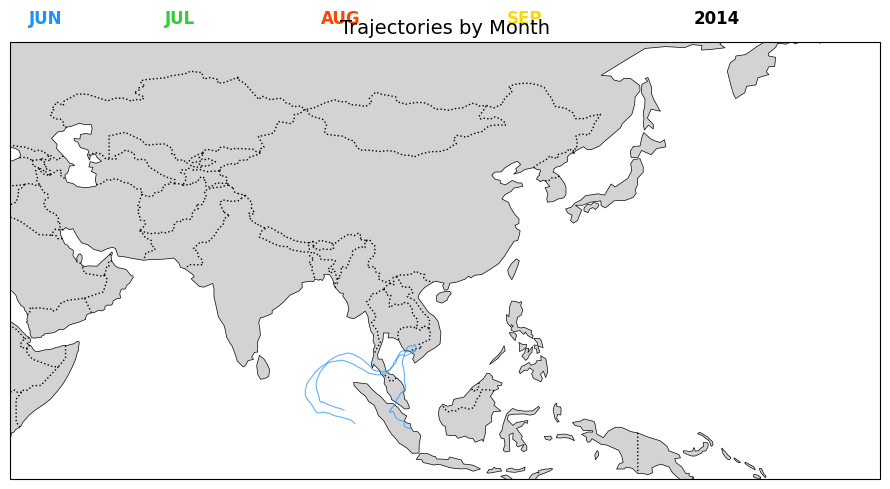

In [169]:
plot_trajectories_by_month(gdf_tmp, year=2014)